# Analyse Fragmenstein results

Fragmenstein places the merges in alignment with the original fragments and minimises the fragment in the protein. Some important metrics and results are output into a json file, including the number of fragments regarded in the merge, the combined RMSD of the merge with the two fragments, and the energy difference between the unbound and bound molecule. This notebook analyses these results.

## Imports

In [1]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import json

# import scripts
sys.path.insert(1, '/home/sabsr3/xchem/fragment_network_merges/scripts')
from FilterFragmenstein import *

## Load original df (before Fragmenstein filtering)

In [2]:
df = pd.read_csv('/home/sabsr3/xchem/fragment_network_merges/data/filtered/overlapFiltered.csv')
df

,Merge,Fragment A ID,Fragment A smiles,Fragment B ID,Fragment B smiles,Synthon,Smiles,Target ID,Target smiles,Fragment A file,Fragment B file,Embedded,Fragment A protein file,Fragment B protein file
0,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,[Xe]C1CCCCC1,Cc1ccncc1NC(C)C1CCCCC1,x0678,O=C(CC1CCCCC1)Nc1cccnc1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
1,x0305_x2569t,x0305,CCNc1ccc(C#N)cn1,x2569,NC(=O)Cc1cccnc1,[Xe]c1cccnc1,CC(C)(CNC(=O)C(=O)O)c1cccnc1,x2569,N#Cc1cncc(CC(=O)Nc2cccnc2)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
2,x0107_x2572t,x0107,CC(=O)Nc1cnccc1C,x2572,N#Cc1cccc(CC(N)=O)c1,[Xe]c1ccccc1,CCOC(=O)c1cnccc1Cc1ccccc1,x2572,Cc1ccncc1NC(=O)Cc1cccc(C#N)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
3,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],CCC(Nc1cccnc1)c1ccc(C)cc1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
4,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],CC(=CC(=O)c1ccc(C)cc1)NCc1cccnc1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,Cl[Xe],Cc1c(Cl)cncc1C(=O)NNC(=O)OC(C)(C)C,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
295,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,Cl[Xe],Cc1c(Cl)cncc1NC(=N)NCC(C)C,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
296,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,Cl[Xe],Cc1c(Cl)cncc1NC(=N)NC(C)(C)C,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
297,x0107_x1382,x0107,CC(=O)Nc1cnccc1C,x1382,CC(NC(=O)CCl)c1cccc(Cl)c1,Cl[Xe],Clc1cnccc1CN1CCCC2(CCCCCC2)C1,x2646,Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...


## Get the data from the json files

In [3]:
# G_bound is : data['Energy']['ligand_ref2015']['total_score']
# G_unbound is : data['Energy']['unbound_ref2015']['total_score']
# the combined RMSD is data['mRMSD']
# data['RMSDs'] - find values not equal to None to get number regarded

all_data = {}

for folder in os.listdir('/home/sabsr3/xchem/Fragmenstein/output/filtered'):
    path = os.path.join('/home/sabsr3/xchem/Fragmenstein/output/filtered', folder)
    for f in os.listdir(path):
        if 'minimised.json' in f:
            d = {}
            json_path = os.path.join(path, f)
            json_file = open(json_path)
            data = json.load(json_file)
            d['G_bound'] = data['Energy']['ligand_ref2015']['total_score']
            d['G_unbound'] = data['Energy']['unbound_ref2015']['total_score']
            d['comRMSD'] = data['mRMSD']
            regarded = 0
            for rmsd in data['RMSDs']:
                if rmsd != None:
                    regarded += 1
            d['regarded'] = regarded
            name = f.replace('.minimised.json', '')
            all_data[name] = d

## Plot the data

In [4]:
deltaGs = []
regarded = []
comRMSDs = []

for merge in all_data:
    deltaG = all_data[merge]['G_bound'] - all_data[merge]['G_unbound']
    deltaGs.append(deltaG)
    regarded.append(all_data[merge]['regarded'])
    comRMSDs.append(all_data[merge]['comRMSD'])

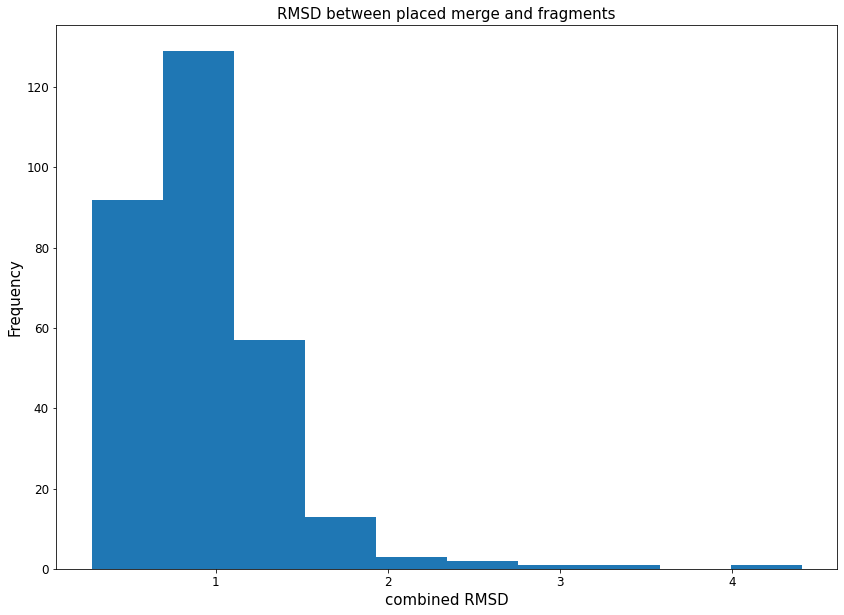

In [5]:
plt.figure(figsize=(14,10))
plt.hist(comRMSDs)
plt.title('RMSD between placed merge and fragments', fontsize=15)
plt.xlabel('combined RMSD', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

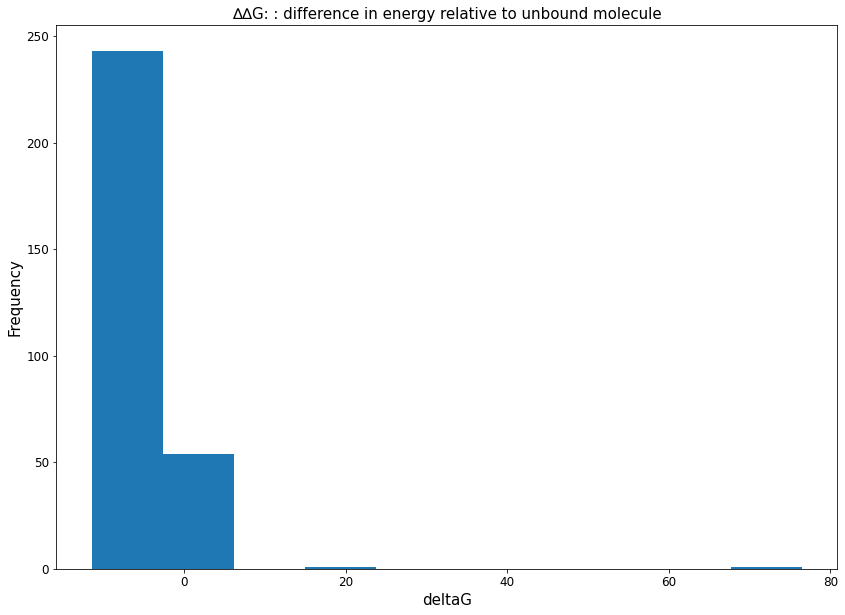

In [6]:
plt.figure(figsize=(14,10))
plt.hist(deltaGs)
plt.title('∆∆G: : difference in energy relative to unbound molecule', fontsize=15)
plt.xlabel('deltaG', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

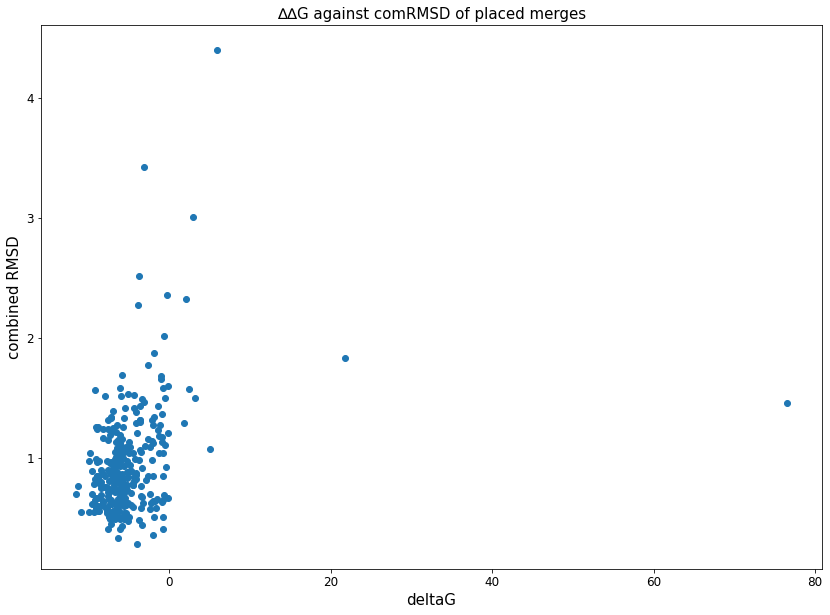

In [7]:
plt.figure(figsize=(14,10))
plt.scatter(deltaGs, comRMSDs)
plt.title('∆∆G against comRMSD of placed merges', fontsize=15)
plt.xlabel('deltaG', fontsize=15)
plt.ylabel('combined RMSD', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Plot the data after filtering for molecules where both fragments were considered in the placement/minimisation

In [8]:
filtered = []

for i, r in enumerate(regarded):
    if r == 2:
        filtered.append(i)

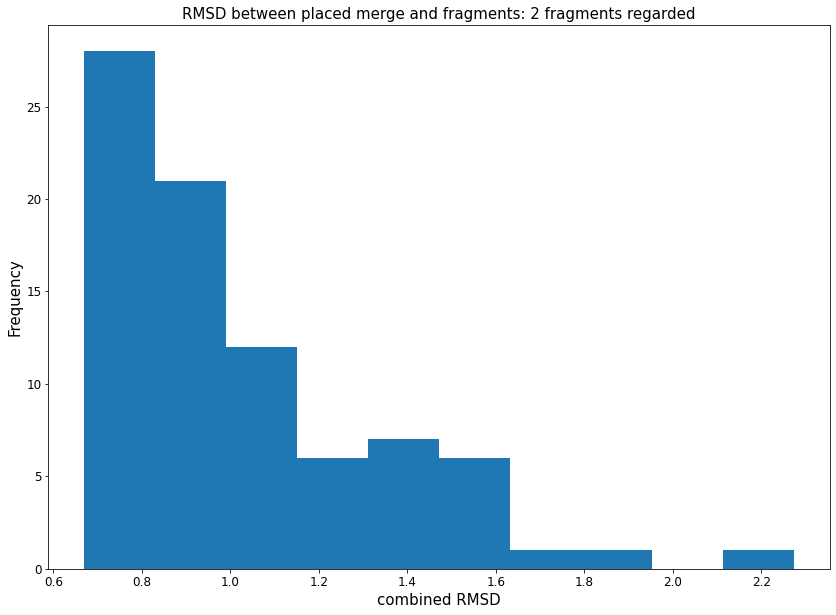

In [9]:
plt.figure(figsize=(14,10))
plt.hist([comRMSDs[i] for i in filtered])
plt.title('RMSD between placed merge and fragments: 2 fragments regarded', fontsize=15)
plt.xlabel('combined RMSD', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

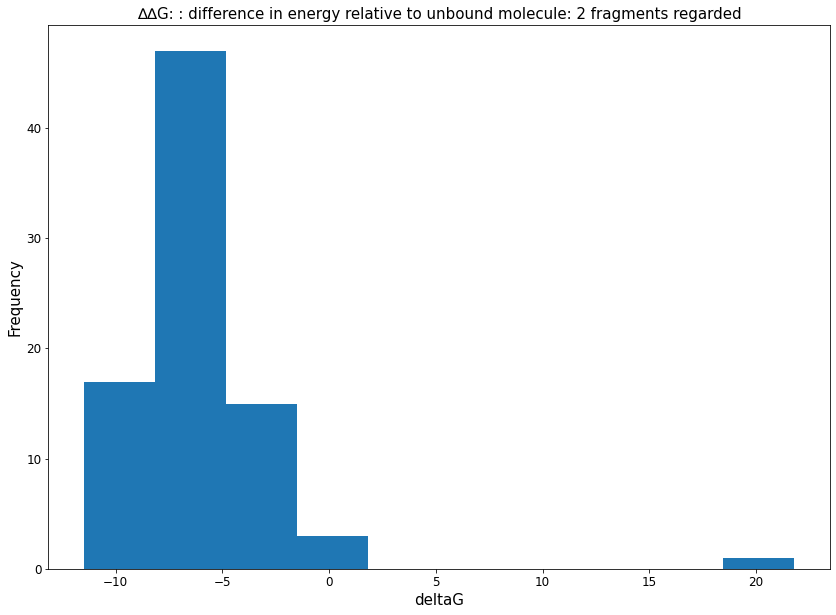

In [10]:
plt.figure(figsize=(14,10))
plt.hist([deltaGs[i] for i in filtered])
plt.title('∆∆G: : difference in energy relative to unbound molecule: 2 fragments regarded', fontsize=15)
plt.xlabel('deltaG', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

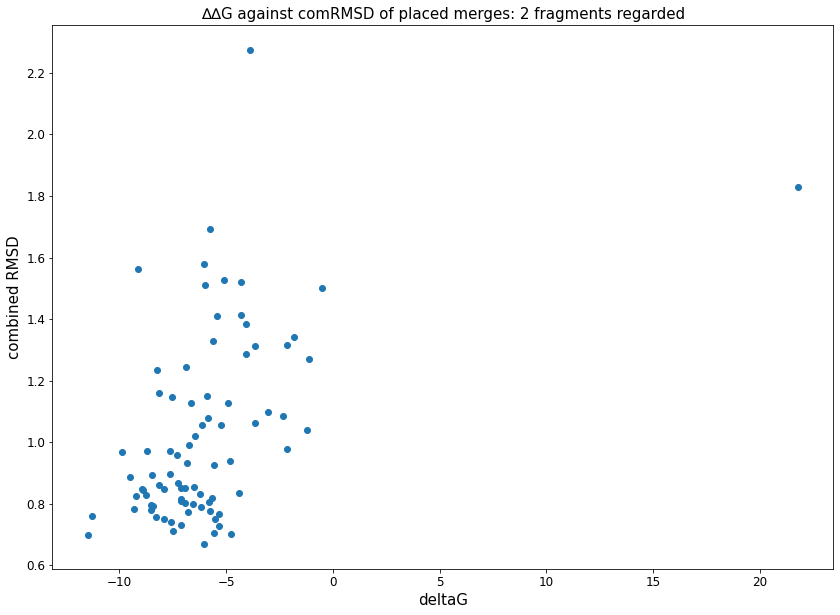

In [11]:
plt.figure(figsize=(14,10))
plt.scatter([deltaGs[i] for i in filtered], [comRMSDs[i] for i in filtered])
plt.title('∆∆G against comRMSD of placed merges: 2 fragments regarded', fontsize=15)
plt.xlabel('deltaG', fontsize=15)
plt.ylabel('combined RMSD', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Count the number of compounds that would fulfill some criteria

2 fragments regarded, negative delta G and comRMSD above 1 or 1.5 A

In [12]:
count = 0

for r, dG, rmsd in zip(regarded, deltaGs, comRMSDs):
    if r == 2:
        if dG < 0:
            if rmsd < 1.5:
                count += 1

print('Number of compounds with negative deltaG and comRMSD <1.5A:', count)

Number of compounds with negative deltaG and comRMSD <1.5A: 74


In [13]:
count = 0

for r, dG, rmsd in zip(regarded, deltaGs, comRMSDs):
    if r == 2:
        if dG < 0:
            if rmsd < 1:
                count += 1

print('Number of compounds with negative deltaG and comRMSD <1A:', count)

Number of compounds with negative deltaG and comRMSD <1A: 50


Filter the results in the df

In [14]:
lst = []

for folder in os.listdir('/home/sabsr3/xchem/Fragmenstein/output/filtered'):
    path = os.path.join('/home/sabsr3/xchem/Fragmenstein/output/filtered', folder)
    for f in os.listdir(path):
        if 'minimised.json' in f:
            json_path = os.path.join(path, f)
            lst.append(FragFilter(json_path).filter())

In [20]:
filtered = [i for i in lst if i != None]
print('Number of compounds: ', len(filtered))

Number of compounds:  74


In [25]:
filtered[0].split('/')[7].split('-')[2]

'53'

In [30]:
def get_indices(fnames):
    indices = []
    for fname in fnames:
        indices.append(fname.split('/')[7].split('-')[2])
    return indices

In [31]:
indices = get_indices(filtered)

In [33]:
new_df = df[df.index.isin(indices)]

In [34]:
new_df

,Merge,Fragment A ID,Fragment A smiles,Fragment B ID,Fragment B smiles,Synthon,Smiles,Target ID,Target smiles,Fragment A file,Fragment B file,Embedded,Fragment A protein file,Fragment B protein file
0,x0107_x0678t,x0107,CC(=O)Nc1cnccc1C,x0678,NC(=O)CC1CCCCC1,[Xe]C1CCCCC1,Cc1ccncc1NC(C)C1CCCCC1,x0678,O=C(CC1CCCCC1)Nc1cccnc1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
11,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],COC(Cc1ccccc1)CS(=O)(=O)Nc1ccc(C)cn1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
15,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],CC(=O)N(CCc1ccccc1)CC(=O)Nc1cnccc1C,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
17,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],CC1COCCC1NC(=O)Nc1cccnc1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
20,x0434_x2608t,x0434,O=C(Nc1ccccc1)Nc1cccnc1,x2608,Cc1ccc(NC(N)=O)s1,C[Xe],CC1CC(NC(=O)Nc2cccnc2)CCO1,x2608,Cc1ccc(NC(=O)Nc2cccnc2)s1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,x0107_x2908t,x0107,CC(=O)Nc1cnccc1C,x2908,NC(=O)Nc1cccc(Cl)c1,Cl[Xe],Cc1ccnc(Cl)c1NS(=O)(=O)CCC(=O)O,x2908,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
237,x0107_x2908t,x0107,CC(=O)Nc1cnccc1C,x2908,NC(=O)Nc1cccc(Cl)c1,Cl[Xe],Cc1ccnc(Cl)c1NS(=O)(=O)C(C)C(=O)O,x2908,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
238,x0107_x2908t,x0107,CC(=O)Nc1cnccc1C,x2908,NC(=O)Nc1cccc(Cl)c1,Cl[Xe],Cc1ccnc(Cl)c1NCC(C)CNC(=O)OC(C)(C)C,x2908,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...
268,x0678_x1249,x0678,O=C(CC1CCCCC1)Nc1cccnc1,x1249,N#Cc1ccc(CNC(=O)N2CCOCC2)cc1,N#C[Xe],N#Cc1cccnc1SCC(=O)NC1CCCCC1,x2600,N#Cc1cccc(CC(=O)Nc2cccnc2)c1,/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...,"<img data-content=""rdkit/molecule"" src=""data:i...",/home/sabsr3/xchem/fragment_network_merges/dat...,/home/sabsr3/xchem/fragment_network_merges/dat...


### Save to csv

In [37]:
new_df.to_csv('/home/sabsr3/xchem/fragment_network_merges/data/filtered/fragmensteinFiltered.csv')